In [1]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib as mpl

from   astropy.table import Table

In [2]:
cwd = os.getcwd()
code_root = '/'.join(x for x in cwd.split('/')[:-2])

sys.path.append(code_root)

print(cwd)
print(code_root)

/cosma/home/durham/dc-moor2/DESI/docs/nb
/cosma/home/durham/dc-moor2/DESI


In [3]:
import pubplot

from   cosmo         import cosmo, fsky
from   cartesian     import rotate
from   findfile      import findfile
from   poisson       import fillfactor_expectation, fillfactor_poisson

In [4]:
# update pytest

survey = 'desi' #'gama'
field  = 'R1'
dryrun = False
realz  = 0
version = 'latest'

In [5]:
nbar = 2.
radius = 8.

In [6]:
fpath = findfile(ftype='randoms', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 15726),
             ('FIELD', 'R1'),
             ('AREA', 6.2904),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 265445.3343938506),
             ('RAND_DENS', 0.05924383653572445),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 127.057921113502),
             ('NRAND8_PERR', 11.27199721049921),
             ('EXTNAME', 'RANDOMS')])

In [7]:
fpath = findfile(ftype='randoms_n8', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 15726),
             ('FIELD', 'R1'),
             ('AREA', 6.2904),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 265445.3343938506),
             ('RAND_DENS', 0.05924383653572445),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 127.057921113502),
             ('NRAND8_PERR', 11.27199721049921),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0)])

In [8]:
fpath = findfile(ftype='randoms_bd', field=field, dryrun=dryrun, survey=survey, version=version)
rand = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 15726),
             ('FIELD', 'R1'),
             ('AREA', 6.2904),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 265445.3343938506),
             ('RAND_DENS', 0.05924383653572445),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 127.057921113502),
             ('NRAND8_PERR', 11.27199721049921),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0)])

In [9]:
rand

LOCATION,FIBER,TARGETID,RANDOM_RA,RANDOM_DEC,TILEID,ROS,ROS_DIST,Z,V,RANDID,FIELD,GAMA_FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,IS_BOUNDARY,RAND_N8,FILLFACTOR,BOUND_DIST,BOUNDID,FILLFACTOR_POISSON
int32,int32,int64,float64,float64,int64,int64,float64,float32,float32,int64,bytes2,bytes3,float32,float32,float32,float64,float64,float64,int64,int32,float64,float64,int64,float64
3283,1680,327858169910921745,178.39740154659697,0.21344983439497145,46,1,1.2213914937921317,0.13188991,36528.703,8789,R1,G12,-385.12457,10.774982,1.435312,385.1896680184612,-8.106451749285508,1.517233740585756,0,57,0.44861429732571634,1.8761456819435922,611609,0.44861429732571634
4071,2475,327858175959107365,178.95166593410087,0.5330106831978032,45,1,0.8393004966288434,0.20096172,123746.44,10280,R1,G12,-578.5161,10.586223,5.382871,578.5744151895444,-6.577815080058144,5.505921783629076,0,116,0.9129694471891772,3.427972654596468,33714,0.9129694471891772
316,473,327858127657503118,179.76595895926474,-1.3778669536628012,40,1,1.387823622979398,0.13657011,40440.336,224,R1,G12,-398.4481,1.6275846,-9.583933,398.4518321059044,1.1330363672148884,-9.499190836802372,0,49,0.3856508871747386,0.8026712375568048,715002,0.3856508871747386
2278,1096,327858151795721492,178.5581832615578,-0.5503185345077595,44,1,1.1782186673964086,0.25858837,253993.47,4618,R1,G12,-735.09937,18.502275,-7.0629873,735.2113974506667,-13.408816664909924,-6.906623611354267,0,102,0.8027834794249661,4.132856309781886,377049,0.8027834794249661
218,47,327858139732902877,179.61271625352748,-0.9553646765535753,47,1,0.9554492939572562,0.26009628,258207.28,1933,R1,G12,-739.2908,4.9972205,-12.32855,739.3102553367122,0.12495361524711868,-12.171315001443832,0,123,0.9680624310712826,5.878712517950107,111236,0.9680624310712826
7098,3997,327858169940282249,180.1730535117349,0.17289706767667368,42,1,0.5985672280844161,0.21723734,154691.2,9313,R1,G12,-623.3242,-1.8826652,1.8809718,623.2958003453518,6.201219026927518,2.0135336332391875,0,88,0.692597511660755,1.0790868636464568,265471,0.692597511660755
8092,4343,327858157864880676,180.30104029354644,-0.22101348900748394,46,1,0.7350523912639524,0.19492118,113355.33,6902,R1,G12,-561.9541,-2.952615,-2.1677296,561.920605604227,6.84595047593433,-2.048221066469273,0,101,0.7949130531560938,2.3067570564725925,51712,0.7949130531560938
3070,1540,327858175963303011,179.08684906682518,0.44122321804114334,39,1,0.6767544629124083,0.21262926,145484.81,10481,R1,G12,-610.6147,9.73249,4.7029104,610.6664455012948,-5.501712846820395,4.832786334977159,0,90,0.7083383641984995,1.8905613114804338,322571,0.7083383641984995
6476,3028,327858188068062300,180.72302096628147,0.9667352514734269,49,1,1.481767002958849,0.09320104,13197.035,14419,R1,G12,-274.34167,-3.462128,4.6296964,274.3101126503851,5.362775880327856,4.688036418792772,0,48,0.37778046090586637,0.18421899727331542,423293,0.37778046090586637


In [10]:
fpath = findfile(ftype='randoms_bd_ddp_n8', field=field, dryrun=dryrun, survey=survey, version=version)

rand = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 15726),
             ('FIELD', 'R1'),
             ('AREA', 180.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 265445.3343938506),
             ('RAND_DENS', 0.05924383653572445),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 127.057921113502),
             ('NRAND8_PERR', 11.27199721049921),
             ('EXTNAME', 'TilingCat'),
             ('RSPHERE', 8.0),
             ('TILEID', 238),
             ('TILERA', 216.327),
             ('TILEDEC', -0.717),
             ('FIELDROT', -0.0743063091867413),
             ('FA_PLAN', '2022-07-01T00:00:00.000'),
             ('FA_HA', 0.0),
             ('FA_RUN', '2021-05-29T23:32:41+00:00'),
             ('REQRA', 216.327),
             ('REQDEC', -0.717),
             ('FIELDNUM', 0),
             ('FA_VER', '4.0.0'),
             ('FA_SURV', 'sv3'),
             ('DEPNAM00', 'python'),
       

Text(0, 0.5, 'DEC [deg.]')

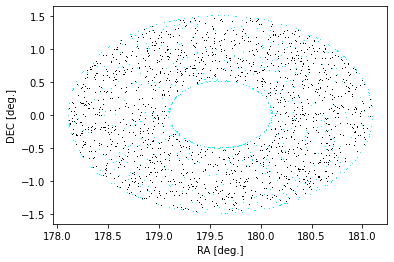

In [11]:
pl.plot(rand['RANDOM_RA'][::10], rand['RANDOM_DEC'][::10], marker=',', lw=0.0, c='k')
pl.plot(rand['RANDOM_RA'][rand['IS_BOUNDARY'].astype(bool)], rand['RANDOM_DEC'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='cyan')

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

Text(0.5, 0, 'V')

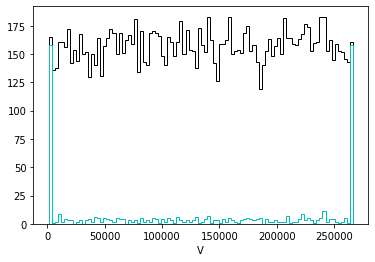

In [12]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(rand['V'][rand['IS_BOUNDARY'].astype(bool)], bins=100, histtype='step', color='c')

pl.xlabel('V')

(0.0, 0.6)

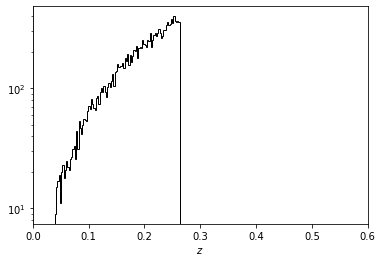

In [13]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')

pl.axvline(300. / 2.9979e5, lw=0.5, c='k')

pl.yscale('log')
pl.xlabel('$z$')

pl.xlim(0.0, 0.6)

In [14]:
pos = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]

Text(0, 0.5, '$y$')

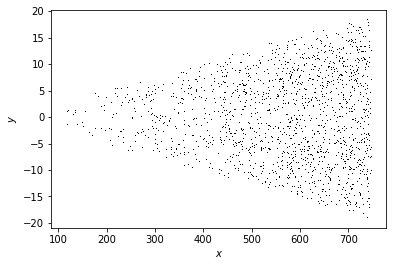

In [15]:
pl.plot(pos[::10,0], pos[::10,1], marker=',', lw=0.0, c='k')

pl.xlabel('$x$')
pl.ylabel('$y$')

Text(0, 0.5, '$y$')

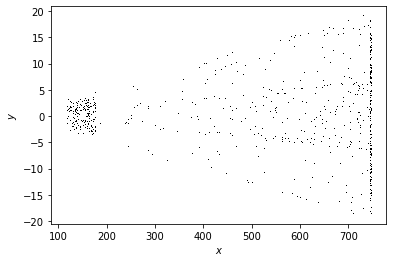

In [16]:
pl.plot(pos[:,0][rand['IS_BOUNDARY'].astype(bool)], pos[:,1][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='k')

pl.xlabel('$x$')
pl.ylabel('$y$')

(0.0, 1000.0)

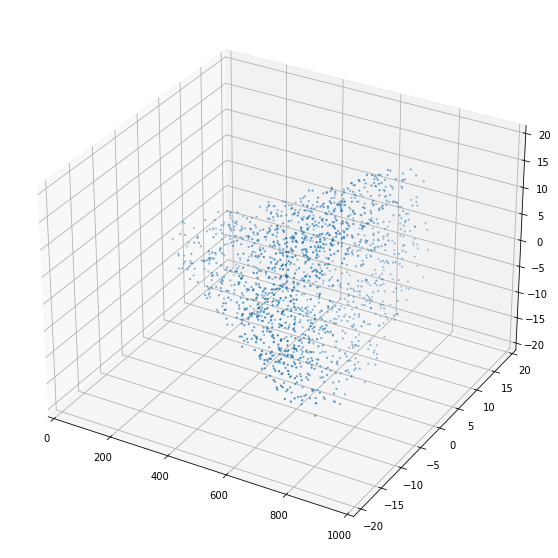

In [17]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos[::10, 0],\
           pos[::10, 1],\
           pos[::10, 2],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

(0.0, 1000.0)

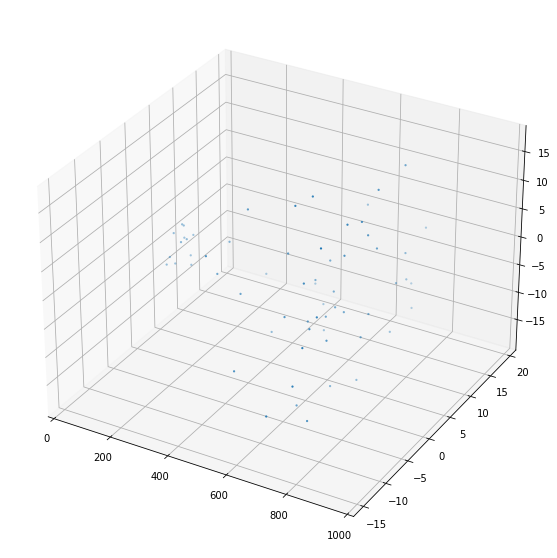

In [18]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos[:,0][rand['IS_BOUNDARY'].astype(bool)][::10],\
           pos[:,1][rand['IS_BOUNDARY'].astype(bool)][::10],\
           pos[:,2][rand['IS_BOUNDARY'].astype(bool)][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

In [19]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.01004705583110772

In [20]:
np.mean(rand['IS_BOUNDARY'].data)

0.03980668955869261

In [21]:
rand.dtype.names

('LOCATION',
 'FIBER',
 'TARGETID',
 'RANDOM_RA',
 'RANDOM_DEC',
 'TILEID',
 'ROS',
 'ROS_DIST',
 'Z',
 'V',
 'RANDID',
 'FIELD',
 'GAMA_FIELD',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'ROTCARTESIAN_X',
 'ROTCARTESIAN_Y',
 'ROTCARTESIAN_Z',
 'IS_BOUNDARY',
 'RAND_N8',
 'FILLFACTOR',
 'BOUND_DIST',
 'BOUNDID',
 'FILLFACTOR_POISSON',
 'DDP1_N8',
 'DDP2_N8',
 'DDP3_N8',
 'IN_DDP1',
 'IN_DDP2',
 'IN_DDP3',
 'DDP1_DELTA8',
 'DDP2_DELTA8',
 'DDP3_DELTA8',
 'DDP1_DELTA8_TIER')

In [22]:
rand['RAND_N8'].data.min(), rand['RAND_N8'].data.max()

(11, 154)

(50.0, 2500.0)

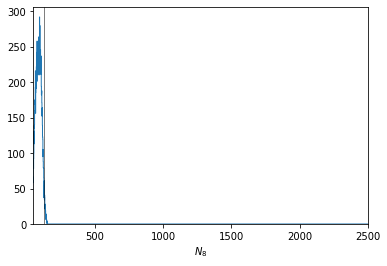

In [23]:
_ = pl.hist(rand['RAND_N8'], bins=np.arange(0, 3500, 1), histtype='step')

pl.axvline(rand.meta['NRAND8'], c='k', lw=0.5)

pl.xlabel(r'$N_8$')
pl.xlim(50., 2500.)

In [24]:
# 100. * np.sqrt(rand.meta['NRAND8']) / rand.meta['NRAND8']

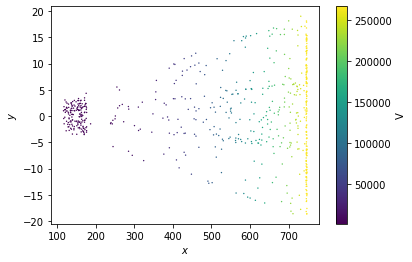

In [25]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos[:,0][isin], pos[:,1][isin], lw=0.0, c=rand['V'][isin], s=2)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='V')

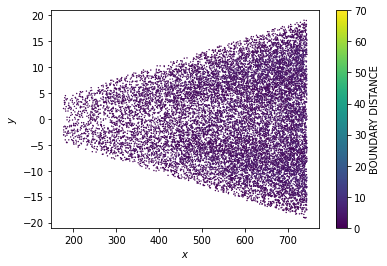

In [26]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos[:,0][isin], pos[:,1][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='BOUNDARY DISTANCE')

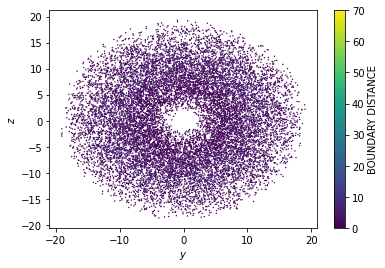

In [27]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos[:,1][isin], pos[:,2][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('$y$')
pl.ylabel('$z$')
pl.colorbar(label='BOUNDARY DISTANCE')

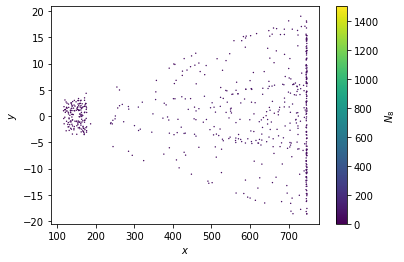

In [28]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos[:,0][isin], pos[:,1][isin], lw=0.0, c=rand['RAND_N8'][isin], vmin=0, vmax=1500, s=2)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label=r'$N_8$')

(0.2, 1.2)

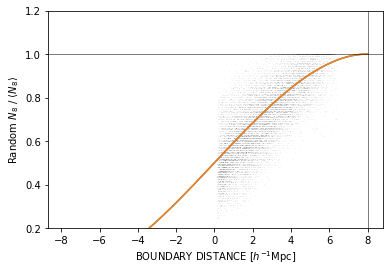

In [29]:
def theory_ff(bound_dist, radius):
    d = bound_dist
    r = radius
    sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]
    
    return sphere_cap_vol

d = np.arange(0., 16., 0.1)
r = np.ones_like(d) * 8 # Mpc/h
sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]

isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'][isin], rand['FILLFACTOR'][isin], marker='.', lw=0.0, s=1, alpha=0.1, c='k')
pl.plot(8. - d, sphere_cap_vol)
pl.plot(8. - d, theory_ff(d, 8))


pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random $N_8 \ / \ \langle N_8 \rangle$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.2)

/cosma/home/durham/dc-moor2/DESI/poisson.py:21: RuntimeWarning: invalid value encountered in sqrt
  a        = np.sqrt(2 * h * radius - h * h)


(0.2, 1.2)

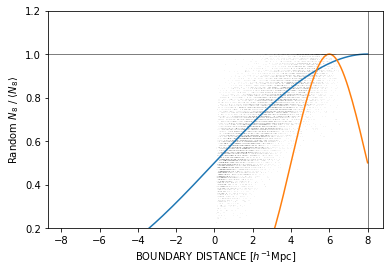

In [33]:
d = np.arange(0., 16., 0.1)
r = np.ones_like(d) * 8 # Mpc/h
sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]

isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'][isin], rand['FILLFACTOR'][isin], marker='.', lw=0.0, s=1, alpha=0.1, c='k')
pl.plot(radius - d, sphere_cap_vol)
pl.plot(radius - d, fillfactor_expectation(d, nbar, radius))


pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random $N_8 \ / \ \langle N_8 \rangle$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.2)

In [31]:
print(var, exp)

NameError: name 'var' is not defined

In [ ]:
# rand_density. TODO: source from somewhere else.
n_bar = 2.
radius = 8.

# number of gals expected == Nrand = var
var = n_bar * (4./3.) * np.pi * radius**3

# actual gals
exp = np.mean(rand['FILLFACTOR'][isin] * var)

sig_ff = np.sqrt(var / exp**2)
s2n = np.sqrt(var)

In [ ]:
rand['FF_THEORY'] = theory_ff(8 - rand['BOUND_DIST'], 8)

pl.scatter(rand['BOUND_DIST'][isin], rand['FILLFACTOR'][isin] - rand['FF_THEORY'][isin], marker='.', lw=0.0, s=1, alpha=0.1, c='k')
pl.axhline(0, ls='--', lw=0.5, color='r')
#pl.axhline(3* -sig_ff, ls='--', color='cyan')
#pl.axhline(3*sig_ff, ls='--', color='cyan')
pl.xlabel(r'BOUNDDIST')
pl.ylabel(r'$ff_{THEORY} - ff$')
pl.xlim(0, 8)
pl.ylim(-0.5, 0.5)

In [ ]:
# TODO: place at top of nb

for idx in range(len(rand)):
    ff = fillfactor_expectation(rand['BOUND_DIST'][idx], nbar=nbar, radius=radius)
    NRAND8, SIGMA_NRAND8, SIGMA_FFACTOR = fillfactor_poisson(rand['FILLFACTOR'][idx], nbar=nbar, radius=radius)

In [ ]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [$h^{-1}$Mpc]')

In [ ]:
gold = Table.read(os.environ['HOME'] + '/data/{}/gama_gold_ddp_n8.fits'.format(version))
gold.meta

In [ ]:
ddp_zmin  = gold.meta['DDP1_ZMIN']
ddp_zmax  = gold.meta['DDP1_ZMAX']

isin      = (rand['Z'] > ddp_zmin) & (rand['Z'] < ddp_zmax)

fills     = rand['FILLFACTOR'].data[isin]
pos_slice = pos[isin]

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
plt.scatter(pos_slice[:,0],\
            pos_slice[:,1],\
            c=fills,\
            marker='.',\
            lw=0.0,\
            s=1,\
            vmin=0.,\
            vmax=1.,\
            cmap='hot')

pl.xlabel('$x$ [$h^{-1}$Mpc]')
pl.ylabel('$y$ [$h^{-1}$Mpc]')

pl.colorbar(label='FILLFACTOR')
    
plt.title('{}'.format(field))
plt.show()

In [ ]:
for idx in np.arange(1, 4, 1):
    ddp_zmin  = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax  = gold.meta['DDP{}_ZMAX'.format(idx)]

    isin      = (rand['Z'] > ddp_zmin) & (rand['Z'] < ddp_zmax)

    fills     = rand['DDP{}_DELTA8'.format(idx)].data[isin]
    pos_slice = pos[isin]

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=0.,\
                vmax=1.,\
                cmap='hot')
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(100.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP{}  $\delta_8$'.format(idx))
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

In [ ]:
cmap     = plt.cm.tab20c

cmaplist = [cmap(i) for i in range(cmap.N)]

cmap     = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds   = np.linspace(0, 9, 10)
norm     = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [ ]:
# np.unique(rand['DDP{}_DELTA8_TIER'.format(idx)])

In [ ]:
#plt.scatter(rand['CARTESIAN_X'], rand['CARTESIAN_Y'], s='DDP1_'

In [ ]:
for idx in np.arange(1, 2, 1):
    ddp_zmin  = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax  = gold.meta['DDP{}_ZMAX'.format(idx)]

    isin      = (rand['Z'] > ddp_zmin) & (rand['Z'] < ddp_zmax)
    isin      = rand['DDP{}_DELTA8_TIER'.format(idx)] > -999
    
    fills     = rand['DDP{}_DELTA8_TIER'.format(idx)].data[isin]
    pos_slice = pos[isin]

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=1,\
                cmap=cmap,\
                norm=norm)
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(100.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP{}  $\delta_8$'.format(idx))
    
    plt.title('{}:  DDP{}'.format(field, idx))

In [ ]:
# Larger minimum redshift & Smaller maximum redshift. 
isin = (rand['Z'] > gold.meta['DDP1_ZMIN']) & (rand['Z'] < gold.meta['DDP2_ZMAX'])

pl.plot(rand['DDP1_DELTA8'][isin], rand['DDP2_DELTA8'][isin], marker=',', lw=0.0, c='k')

pl.xlim(-1.2, 10.)
pl.ylim(-1.2, 10.)

pl.xlabel('DDP1 $\delta_8$')
pl.ylabel('DDP2 $\delta_8$')

In [ ]:
rand_ddp1fill = np.clip(np.sort(rand[rand['IN_DDP1']]['FILLFACTOR'].data)[::-1], 0, 1) 
rand_ddp2fill = np.clip(np.sort(rand[rand['IN_DDP2']]['FILLFACTOR'].data)[::-1], 0, 1)
rand_ddp3fill = np.clip(np.sort(rand[rand['IN_DDP3']]['FILLFACTOR'].data)[::-1], 0, 1)

In [ ]:
plt.plot(rand_ddp1fill, np.cumsum(rand_ddp1fill) / len(rand_ddp1fill), lw=1, color='blue',  label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP1_ZMIN'], rand.meta['DDP1_ZMAX']))
plt.plot(rand_ddp2fill, np.cumsum(rand_ddp2fill) / len(rand_ddp2fill), lw=1, color='green', label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP2_ZMIN'], rand.meta['DDP2_ZMAX']))
plt.plot(rand_ddp3fill, np.cumsum(rand_ddp3fill) / len(rand_ddp3fill), lw=1, color='red',   label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP3_ZMIN'], rand.meta['DDP3_ZMAX']))

plt.xlabel('Fill factor')
plt.ylabel(r'Volume fraction ($\geq$ Fill factor)')

pl.xlim(0.0, 1.05)
pl.ylim(0.0, 1.05)

plt.legend(frameon=False, loc=3)

# Done.